In [5]:
# import libraries.
import requests
import json
import os
import os
import asyncio
import aiohttp
import datetime


In [2]:


def get_data(restpath, filename):
    BASE_URL = "http://127.0.0.1:9090"
    URL = f"{BASE_URL}/{restpath}"
    print(URL)
    try:
        with requests.get(URL, stream=True) as response:
            if response.status_code == 200:
                print(f"Retrieving data from {URL}...")
                data_list = []
                for line in response.iter_lines():
                    if line:
                        data = json.loads(line.decode('utf-8'))
                        # Expecting data to be a list of hits
                        data_list.extend(data)  # extend instead of append

                # 异步保存数据到文件
                save_data_to_file(data_list, filename)
    except requests.exceptions.RequestException as e:
        print(f"Error: An exception occurred while requesting data from {URL}. Exception: {e}")
        return None

def save_data_to_file(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Data saved to {filename}")

# Example call to get_data
# get_data('your_rest_path', 'output.json')


In [3]:
# Obtain data from the backend server
ROUTE_LIST = ["aircondition","weathercondition","mastodon-aus-social"]
data_folder = './realtimeData'
for route in ROUTE_LIST:
        restpath = "database/" + route
        filename = os.path.join(data_folder, f"{route}.json")
        data = get_data(restpath,filename)




http://127.0.0.1:9090/database/aircondition
Retrieving data from http://127.0.0.1:9090/database/aircondition...
Data saved to ./realtimeData/aircondition.json
http://127.0.0.1:9090/database/weathercondition
Retrieving data from http://127.0.0.1:9090/database/weathercondition...
Data saved to ./realtimeData/weathercondition.json
http://127.0.0.1:9090/database/mastodon-aus-social
Retrieving data from http://127.0.0.1:9090/database/mastodon-aus-social...
Error: An exception occurred while requesting data from http://127.0.0.1:9090/database/mastodon-aus-social. Exception: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))


In [9]:
ROUTE_LIST = ["aircondition", "weathercondition"]
data_folder = './dataInOneDay'

# 获取当前日期和时间
currentTime = datetime.datetime.now().strftime('%Y-%m-%d-%H')
print(currentTime)

# 获取当天的00:00时间
beginTime = datetime.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d-%H')
print(beginTime)
for route in ROUTE_LIST:
    restpath = f"database/{route}/{beginTime}/{currentTime}"
    filename = os.path.join(data_folder, f"{route}_today.json")
    print(f"Processing {restpath} from {beginTime} to {currentTime}")
    # 调用get_data函数
    get_data(restpath, filename)

2024-05-21-21
2024-05-21-00
Processing database/aircondition/2024-05-21-00/2024-05-21-21 from 2024-05-21-00 to 2024-05-21-21
http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-21-21
Retrieving data from http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-21-21...
Data saved to ./dataInOneDay/aircondition_today.json
Processing database/weathercondition/2024-05-21-00/2024-05-21-21 from 2024-05-21-00 to 2024-05-21-21
http://127.0.0.1:9090/database/weathercondition/2024-05-21-00/2024-05-21-21
Retrieving data from http://127.0.0.1:9090/database/weathercondition/2024-05-21-00/2024-05-21-21...
Data saved to ./dataInOneDay/weathercondition_today.json


In [ ]:
# Obtain data from different time period
route_name = "database/mastodon-aus-social/2024-05-19-10/2024-05-19-13"
data = get_data(route_name, "timeperiod.json")
print(data)

http://127.0.0.1:9090/database/mastodon-aus-social/2024-05-19-10/2024-05-19-13
Retrieving data from http://127.0.0.1:9090/database/mastodon-aus-social/2024-05-19-10/2024-05-19-13...
Data saved to timeperiod.json
None


### All the file path

In [5]:
mastodon_file_path = './realtimeData/mastodon-aus-social.json'
air_quality_file_path = './realtimeData/aircondition.json'
weather_file_path = './realtimeData/weathercondition.json'
today_air_quality_file_path = './dataInOneDay/aircondition_today.json'
today_weather_file_path = './dataInOneDay/weathercondition_today.json'

### Air Quality vs Sentiment

In [6]:
import aircondition_vs_sentiment.format_alignment as sfa
import aircondition_vs_sentiment.sentiment_analysis as fa
import aircondition_vs_sentiment.air_quality_analysis as aqa

# read data from file, using these path file
mastodon_df = sfa.load_mastodon_data(mastodon_file_path)
air_quality_data = sfa.load_air_quality_data(air_quality_file_path)

# 合并数据
merged_df = sfa.merge_data(mastodon_df, air_quality_data)

# 添加情绪分析列
merged_df = fa.add_sentiment_column(merged_df)

# 分析空气质量对情绪的影响
grouped = aqa.analyze_air_quality_impact(merged_df)


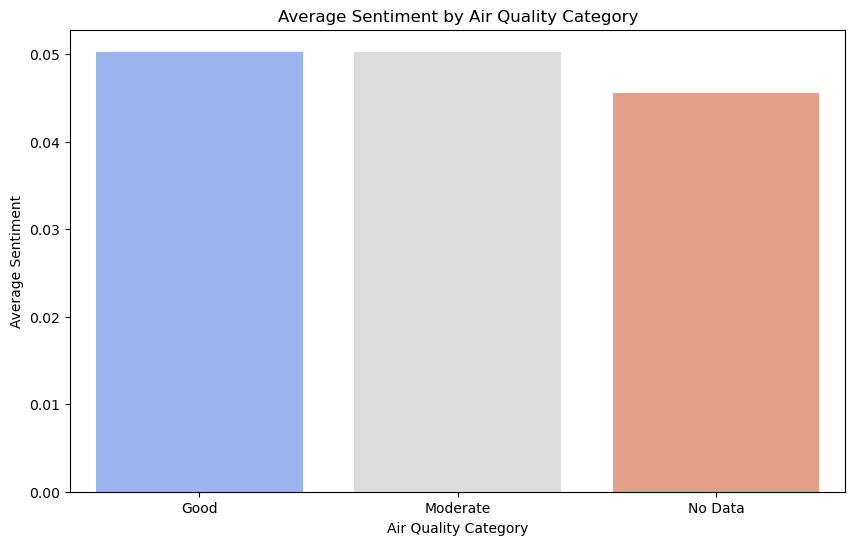

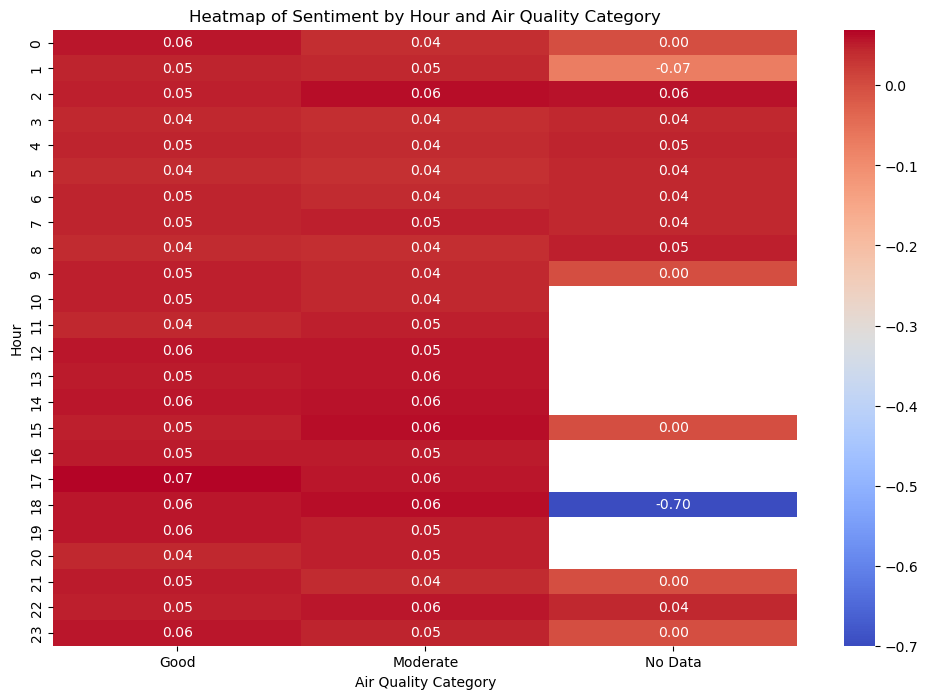

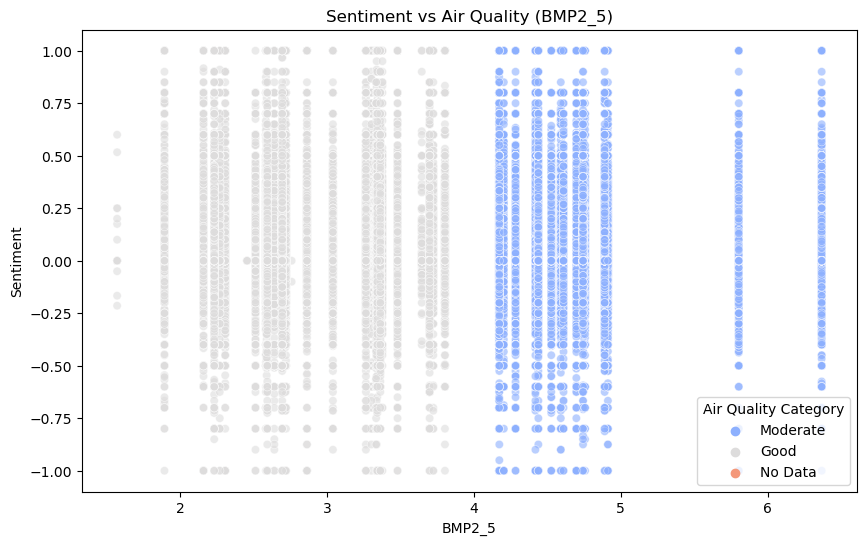

In [ ]:
 # 可视化结果
aqa.visualize_air_quality_impact(grouped)
aqa.plot_heatmap(merged_df)
aqa.plot_scatter(merged_df)

### Weather vs Sentiment

In [ ]:
import weather_vs_sentiment.weather_analysis as wa


# read data from file, using these path file
mastodon_df = wa.load_mastodon_data(mastodon_file_path)
weather_data = wa.load_weather_data(weather_file_path)

# 合并数据
merged_df = wa.merge_weather_data(mastodon_df, weather_data)
corr_matrix = wa.analyze_weather_impact(merged_df)


              post_id                       created_at language  sentiment  \
0  112466696911274363 2024-05-19 08:00:04.739000+00:00       es        0.0   
1  112466696897123755 2024-05-19 08:00:04.554000+00:00       en        1.0   
2  112466696874746294        2024-05-19 08:00:03+00:00       en        0.0   
3  112466696868828674 2024-05-19 08:00:04.078000+00:00       en        0.0   
4  112466696858458901        2024-05-19 08:00:03+00:00       fr        0.0   

                                              tokens  \
0  [gasolinera, coliseum, carbugal, oil, peral, p...   
1  [theres, through, purpose, greatest, don, crea...   
2                                                 []   
3  [made, kuenssbergthe, grant, asked, speeches, ...   
4  [barad, net, seigneur, anneaux, arfy, lego, tr...   

                                                tags       location  hour  
0                          [barata, coruna, galicia]  Melbourne CBD     8  
1                                         

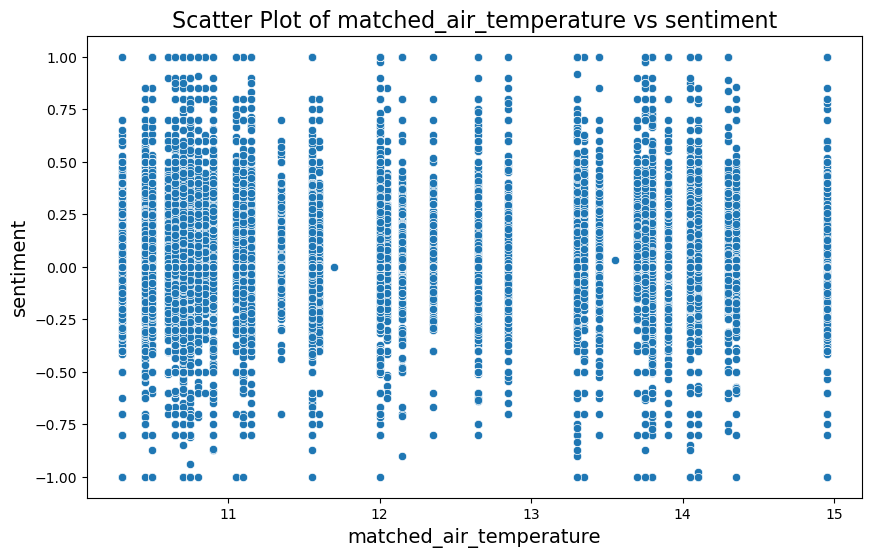

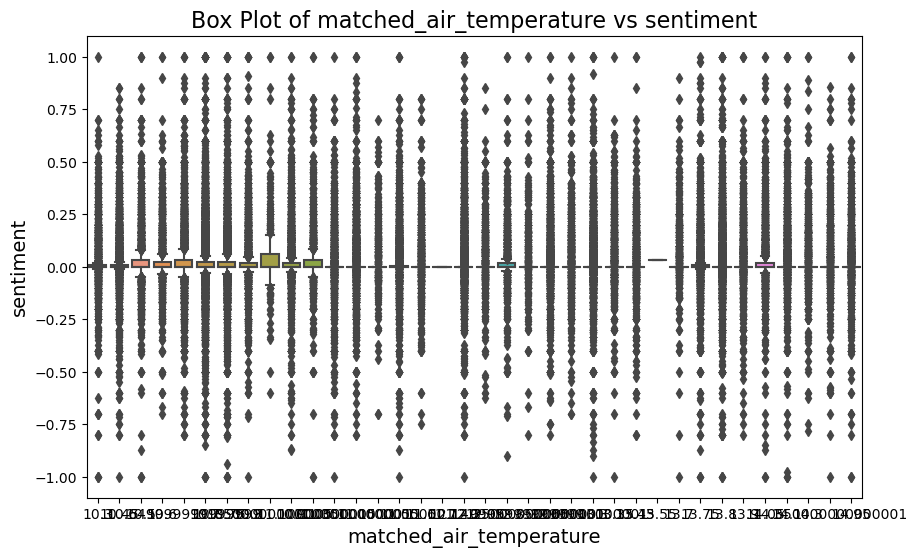

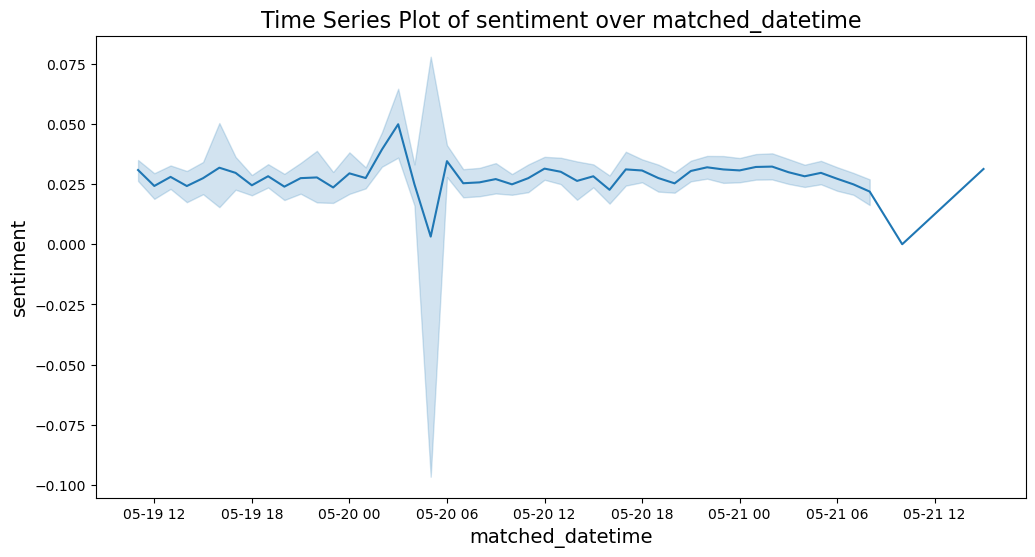

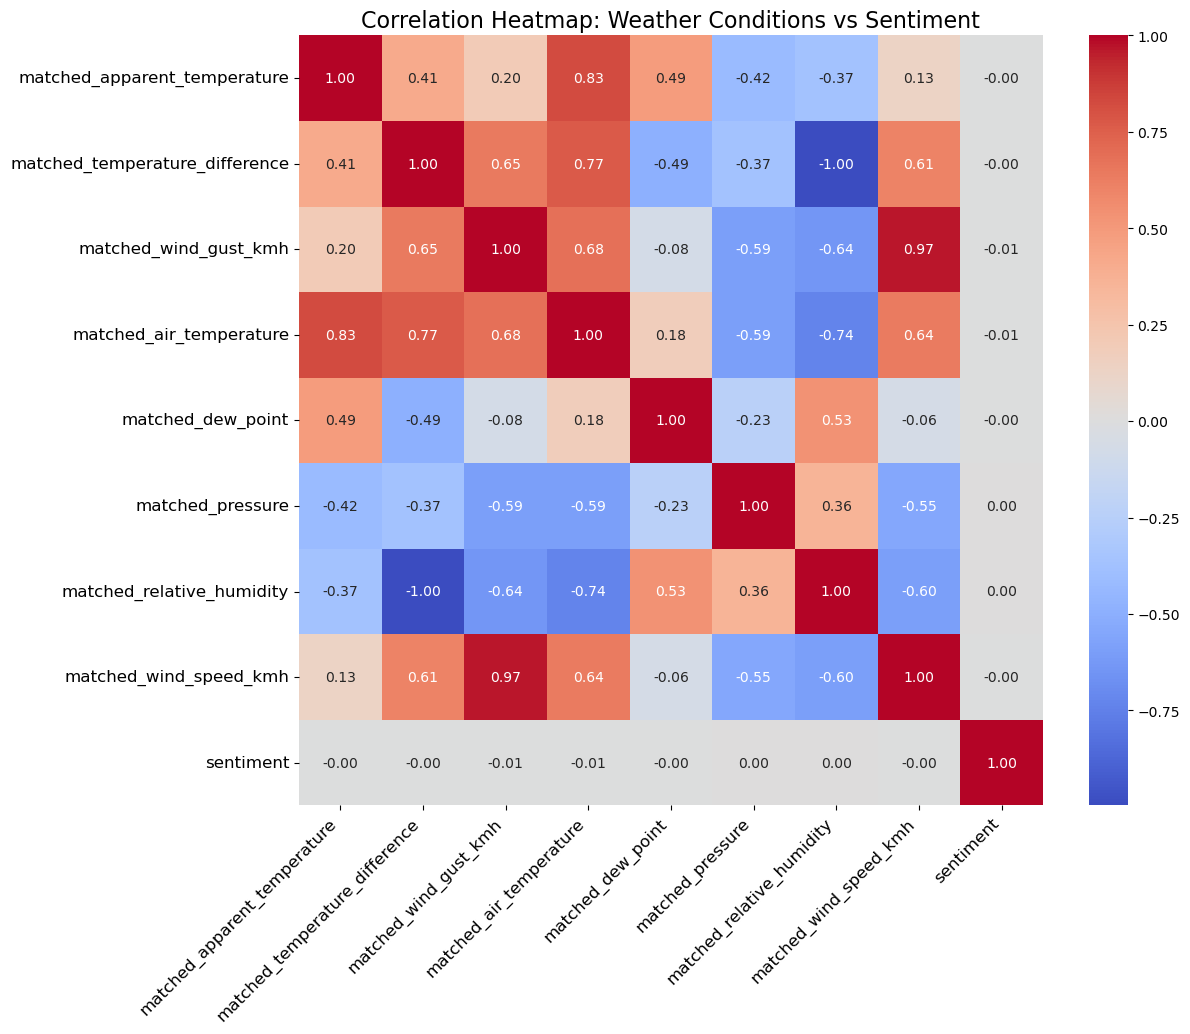

In [ ]:
# 散点图示例
wa.plot_scatter(merged_df, x_col='matched_air_temperature')

# 箱线图示例
wa.plot_box(merged_df, x_col='matched_air_temperature')

# 时间序列图示例
wa.plot_time_series(merged_df, time_col='matched_datetime', y_col='sentiment')

wa.visualize_weather_impact(corr_matrix)

### Aircondition vs Weather

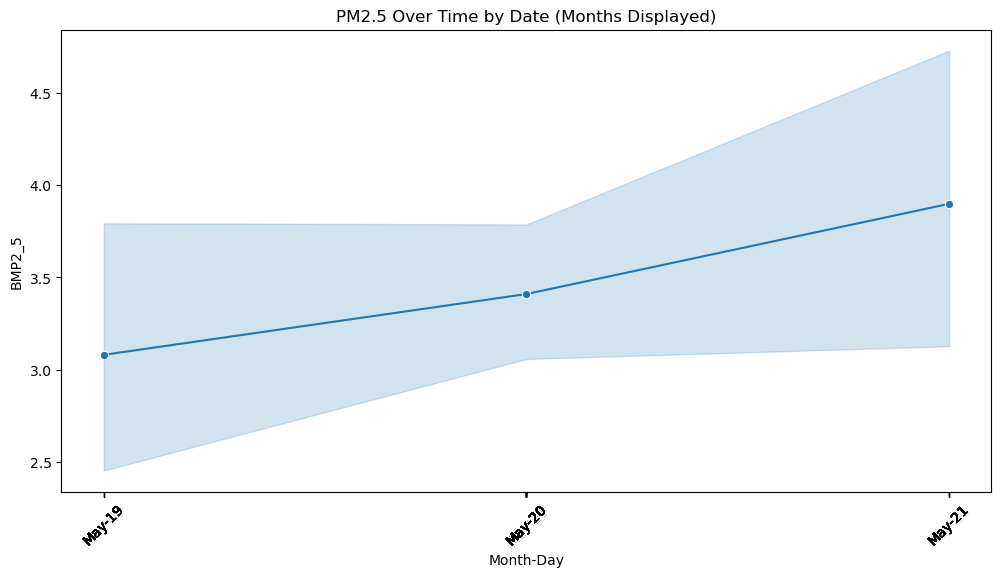

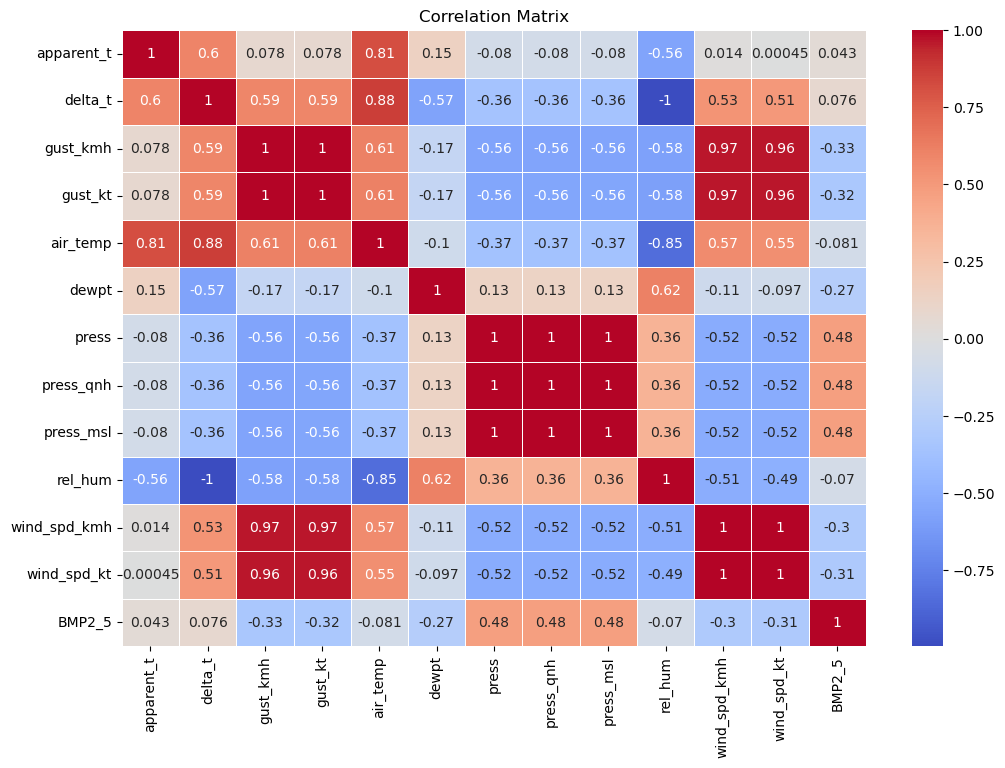

Mean Squared Error: 1.7182749450723678
R^2 Score: -0.122986437342266


In [ ]:
import aircondition_vs_weather.Air_weather_analysis as awa

awa.main(weather_file_path, air_quality_file_path)

### Language Distribution around Australia

In [ ]:
import language_distribution.language_analysis as ld

mastodon_df = ld.load_mastodon_data(mastodon_file_path)
location_language_distribution = ld.analyze_language_distribution_by_location(mastodon_df)

In [ ]:
ld.visualize_language_distribution_by_location(location_language_distribution)

### Method of Travel

In [ ]:
import methods_of_residents.travel_analysis as ta

mastodon_df = ta.load_mastodon_data(mastodon_file_path)
travel_stats, most_popular_travel_modes = ta.analyze_travel_modes(mastodon_df)

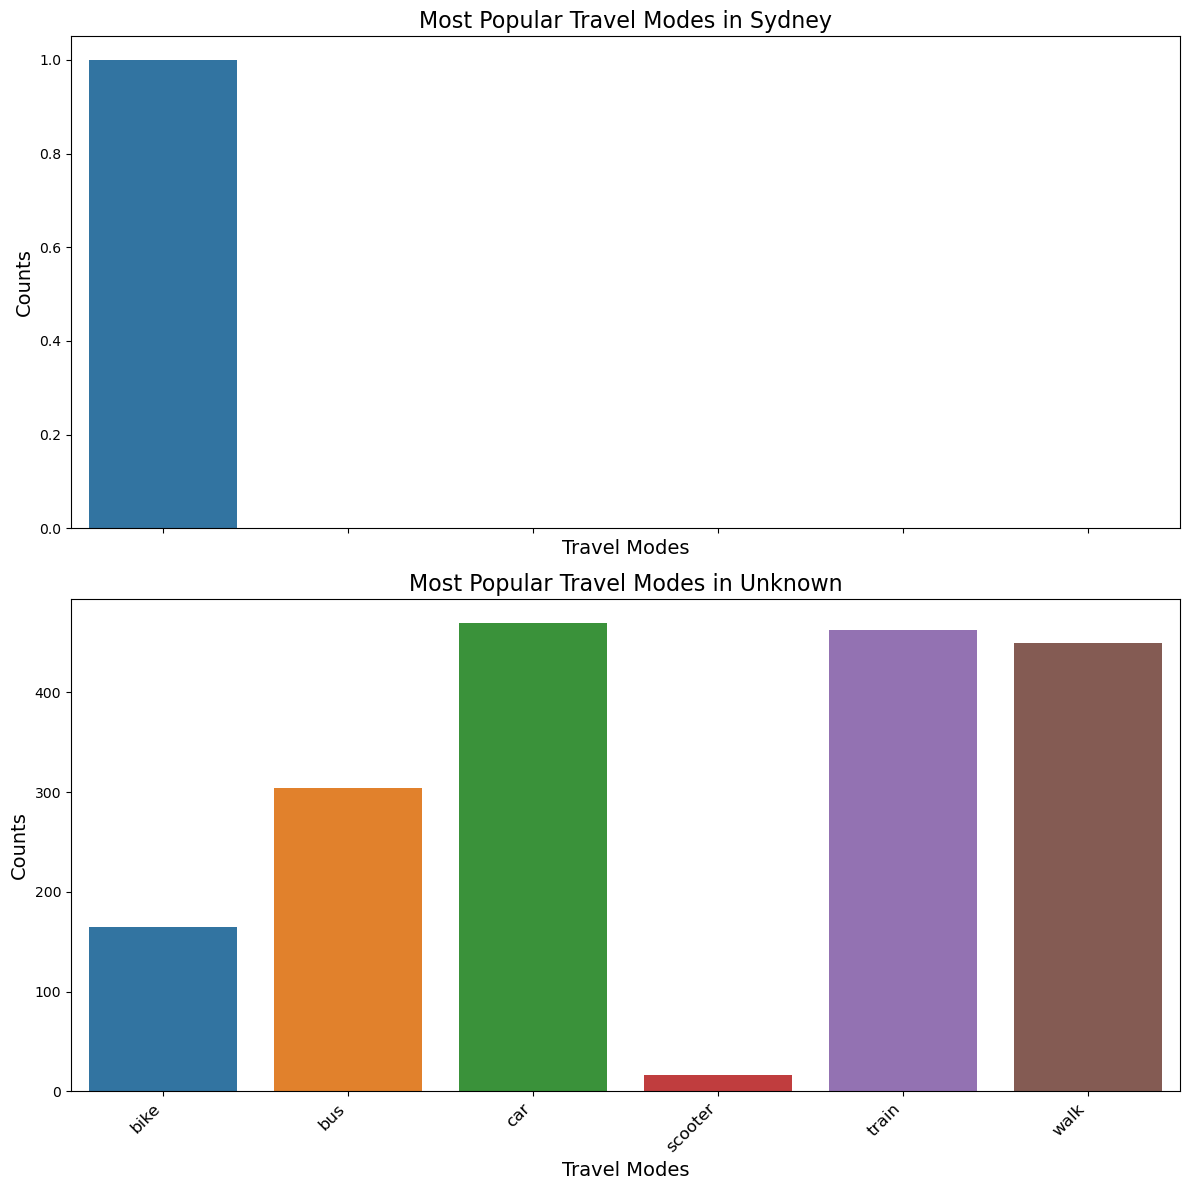

In [ ]:
ta.visualize_travel_modes_by_city(travel_stats)

### Real time data 

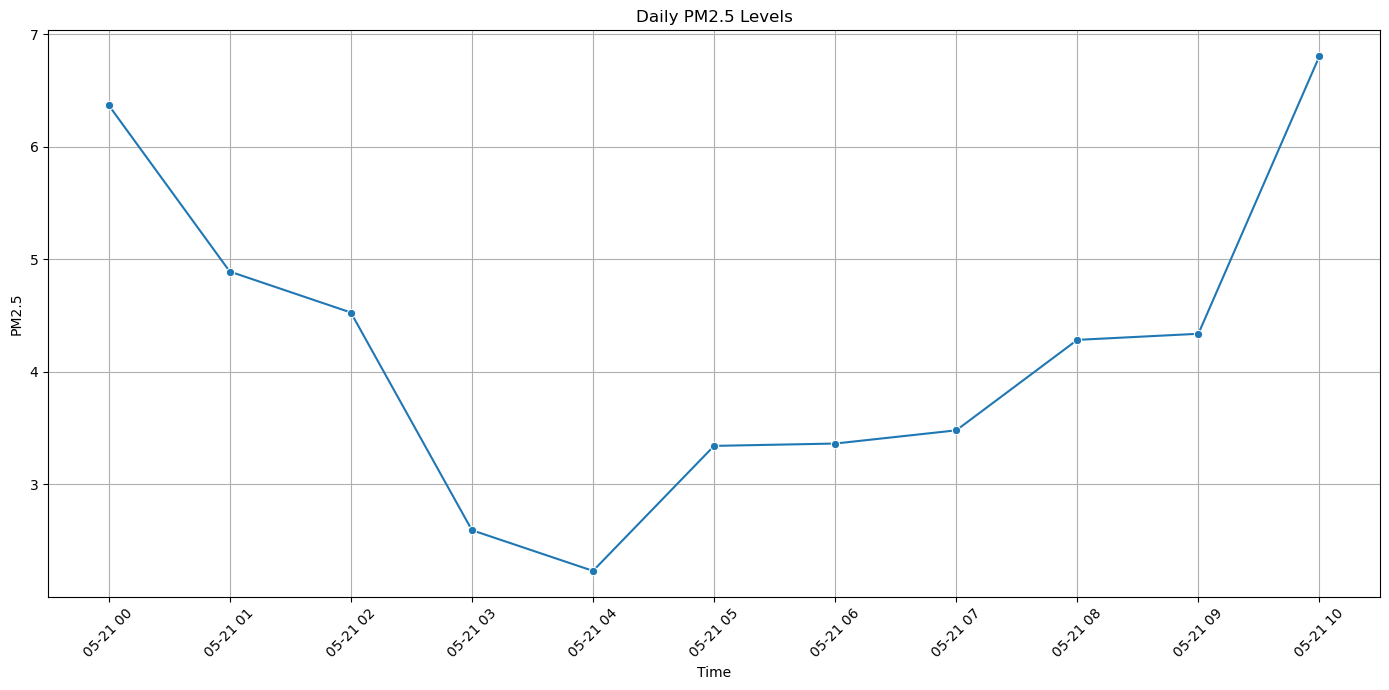

In [3]:
# today's air quality
import oneDayAnalysis.air_quality_one_day as aqoda

pm_today = aqoda.load_pm25_data(today_air_quality_file_path)
aqoda.visualize_pm25(pm_today)

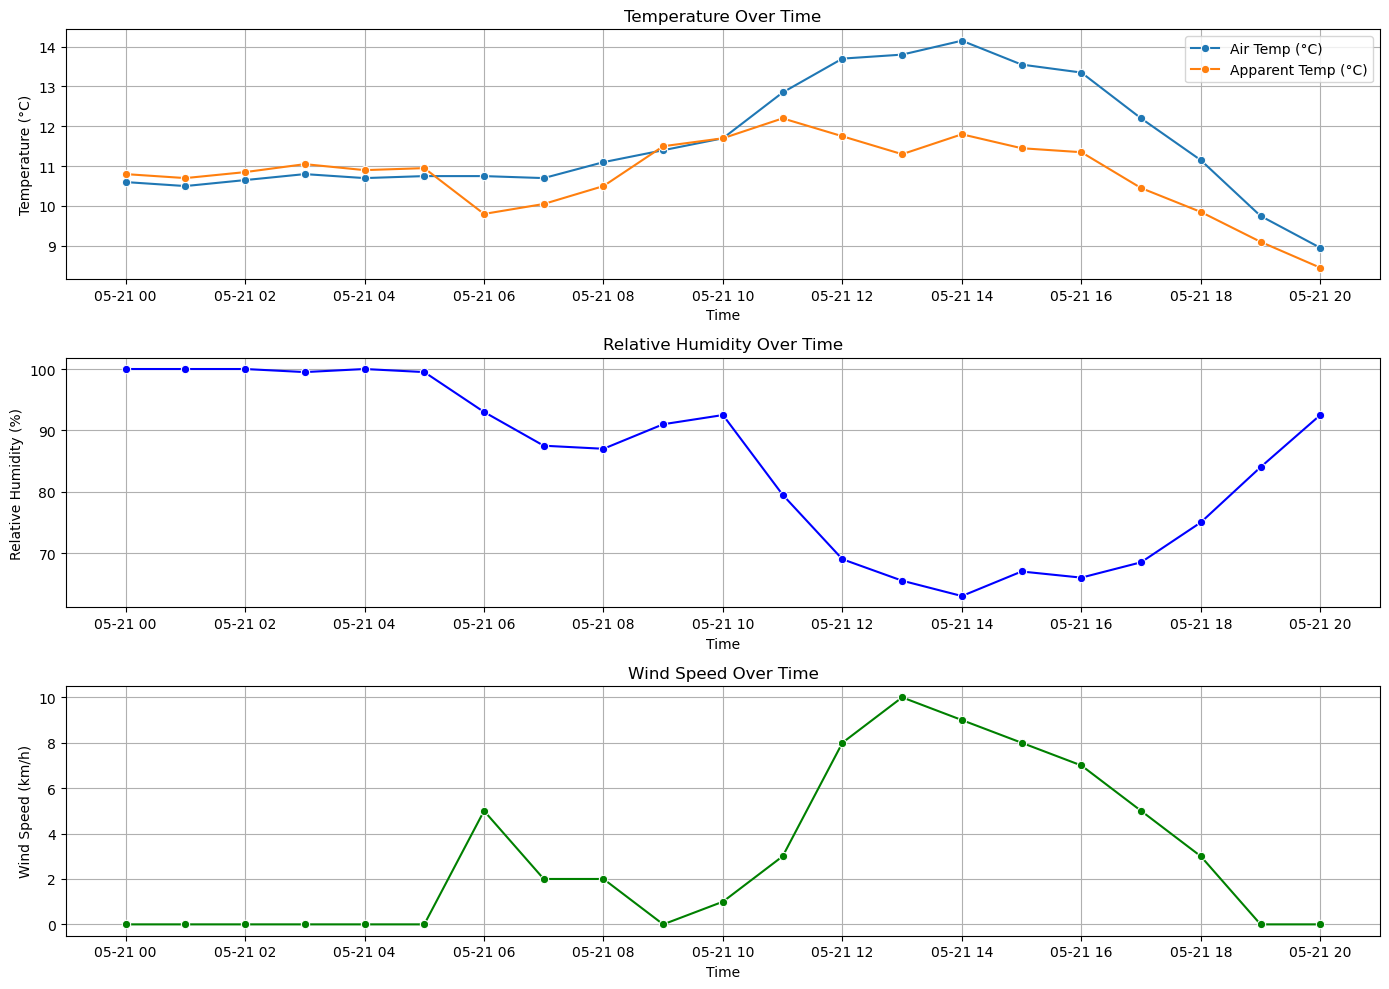

In [4]:
# today's weather
import oneDayAnalysis.weather_one_day as woda

weather_today = woda.load_weather_data(today_weather_file_path)
woda.visualize_weather_data(weather_today)